In [21]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score

In [22]:
# KNN regression and OLS regression

In [23]:
df = pd.read_excel (r'C:\Users\Darin Peacock\Documents\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [25]:
# OLS regression

In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [27]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


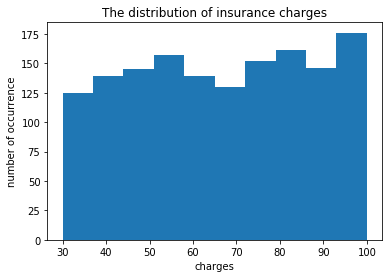

In [28]:
plt.hist(df.HourlyRate)
plt.title("The distribution of insurance charges")
plt.xlabel("charges")
plt.ylabel("number of occurrence")
plt.show()

In [29]:
df["is_Male"] = pd.get_dummies(df.Gender, drop_first=True)
df["is_Yes"] = pd.get_dummies(df.Attrition, drop_first=True)

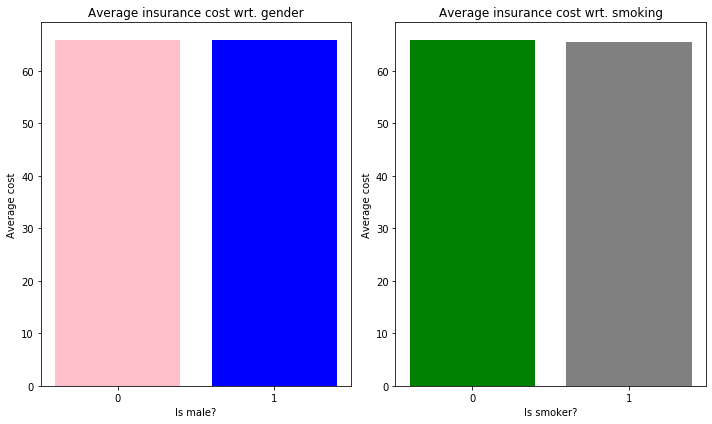

In [30]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(df.groupby("is_Male")["HourlyRate"].mean().index, df.groupby("is_Male")["HourlyRate"].mean(),
       color=("pink","blue"))
plt.title("Average insurance cost wrt. gender")
plt.ylabel("Average cost")
plt.xlabel("Is male?")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(df.groupby("is_Yes")["HourlyRate"].mean().index, df.groupby("is_Yes")["HourlyRate"].mean(),
       color=("green","grey"))
plt.title("Average insurance cost wrt. smoking")
plt.ylabel("Average cost")
plt.xlabel("Is smoker?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()

In [31]:
Y = df['HourlyRate']
X = df[['is_Male','is_Yes']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-0.01148725 -0.37785884]

Intercept: 
 65.95896890956027


In [32]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03443
Date:                Fri, 20 Mar 2020   Prob (F-statistic):              0.966
Time:                        13:09:19   Log-Likelihood:                -6513.0
No. Observations:                1470   AIC:                         1.303e+04
Df Residuals:                    1467   BIC:                         1.305e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.9590      0.866     76.193      0.000      64.261      67.657
is_Male       -0.0115      1.084     -0.011      0.992      -2.137       2.114
is_Yes        -0.3779      1.443     -0.262      0.794      -3.209       2.454
==============================================================================
Omnibus:                     1100.473   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.800
Skew:                          -0.033   Prob(JB):                     8.60e-20
Kurtosis:                       1.804   Cond. No.                         3.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import pandas as pd
df = pd.read_excel (r'C:\Users\Darin Peacock\Documents\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

print(df['Age'])

0       41
1       49
2       37
3       33
4       27
5       32
6       59
7       30
8       38
9       36
10      35
11      29
12      31
13      34
14      28
15      29
16      32
17      22
18      53
19      38
20      24
21      36
22      34
23      21
24      34
25      53
26      32
27      42
28      44
29      46
        ..
1440    36
1441    56
1442    29
1443    42
1444    56
1445    41
1446    34
1447    36
1448    41
1449    32
1450    35
1451    38
1452    50
1453    36
1454    45
1455    40
1456    35
1457    40
1458    35
1459    29
1460    29
1461    50
1462    39
1463    31
1464    26
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64


In [34]:
# KNN regression

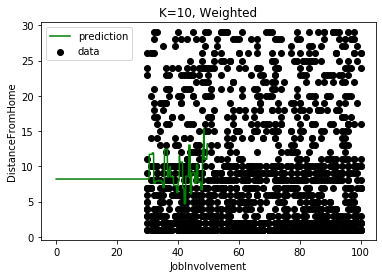

In [35]:
from sklearn import neighbors
import numpy as np

knn_w = neighbors.KNeighborsRegressor(n_neighbors= 10, weights='distance')
X = pd.DataFrame(df.HourlyRate)
Y = df.DistanceFromHome
knn_w.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('JobInvolvement')
plt.ylabel('DistanceFromHome')
plt.title('K=10, Weighted')
plt.show()

In [37]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
X = pd.DataFrame(df.HourlyRate)
Y = df.DistanceFromHome
knn_w = neighbors.KNeighborsRegressor(n_neighbors= 10, weights='distance')
print(cross_val_score(knn_w, X, Y, cv=3))

[-0.09892834 -0.17701278 -0.17984303]


In [ ]:
# The KNN regression here yields an absolute value of 0.09892834 for knn_w while the OLS regression here yields an absolute 
# value of 0.000 for R-squared. Therefore, KNN regression is the better method for this case than OLS regression is.